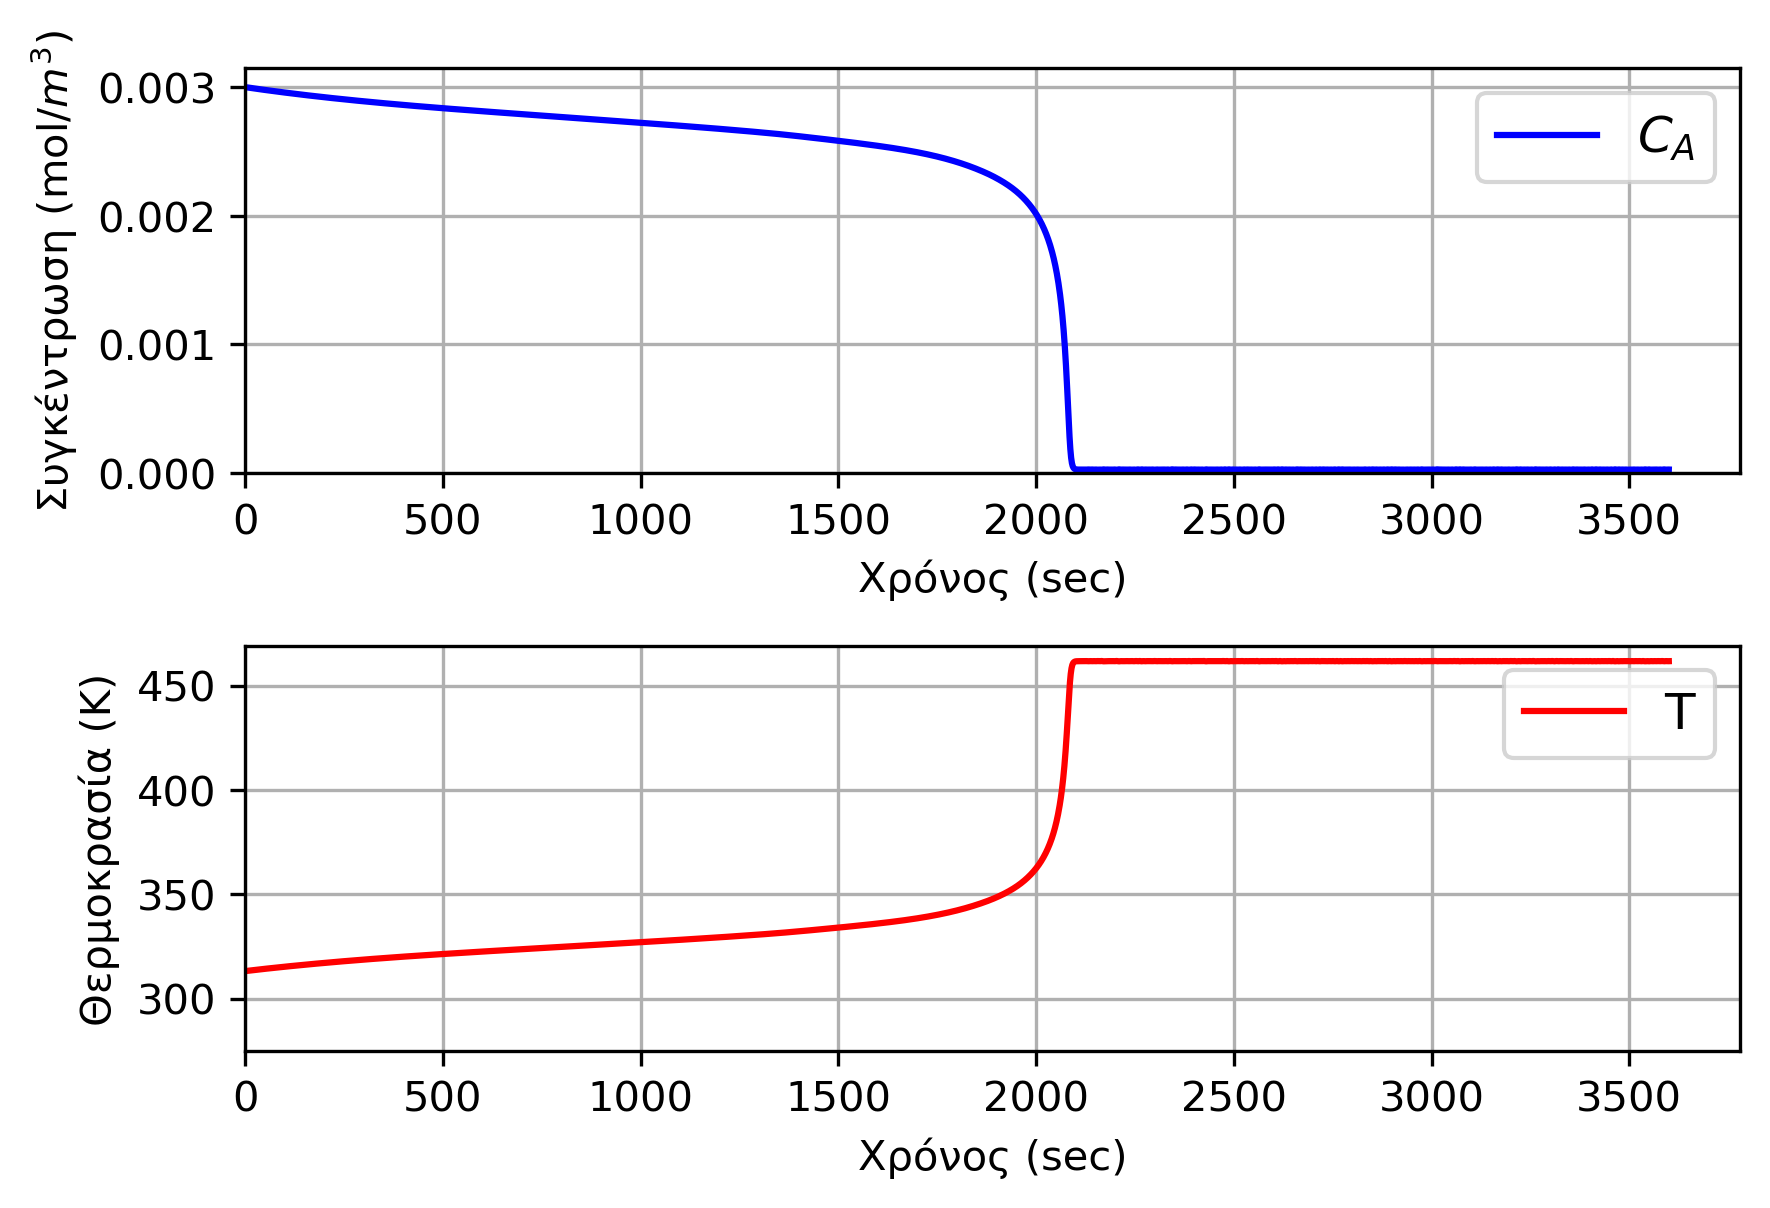

In [10]:
# Define Solve the system of ODEs
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equations (converted from SXA_I_Example_7p10 function)
def SXA_I_Example_7p1(t, x):
    # Model Parameters
    rho = 1        # density of reaction mixture (g*cm^-3)
    To = 313.15    # Reactor Inlet Temperature (K)
    CAo = 0.003    # Inlet Stream Concentration Propylene Oxide (mol/cm3)
    Cp = 1         # Heat Capacity of reaction mixture (cal/g/K)
    k0 = 4.48e6    # Frequency coefficient (1/s)
    E = 15000      # Activation Energy (cal/mol)
    DHr = -50000   # Heat of Reaction (cal/mol)
    V = 18000      # Reactor Volume (cm^3)
    Qo = 60        # Propylene Oxide Inlet Stream (cm3/s)
    R = 1.987      # Universal Gas Constant (cal/mol/K)

    # Variables
    CA, T = x  # Unpack variables from input array x

    # Auxiliary Equations
    k = k0 * np.exp(-E / (R * T))

    # Differential Equations
    dCA_dt = Qo * (CAo - CA) / V - k * CA
    dT_dt = Qo/V * (To-T) - (DHr * k * CA) / (rho * Cp)

    return [dCA_dt, dT_dt]

# Set time span for the integration (e.g., from t=0 to t=10 hours)
t_span = (0, 3600)  # time span in hours
t_eval = np.linspace(0, 3600, 3600)  # time points for evaluation

# Initial concentrations: [CA0]
initial_conditions = [0.003, 313.15]  # Initial values for [CA]

# Solve the ODE system using solve_ivp
sol = solve_ivp(SXA_I_Example_7p1, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for each component
CA = sol.y[0, :]
T  = sol.y[1, :]
time = sol.t

# Plotting results in subplots
plt.figure(dpi=300)

# Subplot 1: C_A vs t
plt.subplot(2, 1, 1)
plt.plot(time, CA, 'b-', linewidth=1.5)
plt.legend(['$C_A$'], fontsize=12)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.xlabel('Χρόνος (sec)', fontsize=10)
plt.ylabel('Συγκέντρωση (mol/$m^3$)', fontsize=10)

# Subplot 2: C_B vs t
plt.subplot(2, 1, 2)
plt.plot(time, T, 'r-', linewidth=1.5)
plt.legend(['T'], fontsize=12)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=275)  # Y-axis starts at 275
plt.xlabel('Χρόνος (sec)', fontsize=10)
plt.ylabel('Θερμοκρασία (Κ)', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()
